In [ ]:
import numpy as np
import pandas as pd

import tensorflow
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

from pathlib import Path
from sklearn import preprocessing

Id=[]

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset'):
    for filename in filenames:
        Id.append(os.path.join(dirname, filename))
Id[:25]

['/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset/Rice_Citation_Request.txt',
 '/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset/Arborio/Arborio (9674).jpg',
 '/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset/Arborio/Arborio (936).jpg',
 '/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset/Arborio/Arborio (9656).jpg',
 '/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset/Arborio/Arborio (9091).jpg',
 '/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset/Arborio/Arborio (945).jpg',
 '/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset/Arborio/Arborio (9265).jpg',
 '/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset/Arborio/Arborio (9463).jpg',
 '/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset/Arborio/Arborio (9476).jpg',
 '/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset/Arborio/Arborio (9092).jpg',
 '/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset/Arborio/Arborio (9634).jpg',
 '/content/drive/MyDrive/UFSC/Traba

In [ ]:
root_path = '/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset'

In [ ]:
Id.remove('/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset/Rice_Citation_Request.txt')
Id[:5]

['/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset/Arborio/Arborio (9674).jpg',
 '/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset/Arborio/Arborio (936).jpg',
 '/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset/Arborio/Arborio (9656).jpg',
 '/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset/Arborio/Arborio (9091).jpg',
 '/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset/Arborio/Arborio (945).jpg']

In [ ]:
train=pd.DataFrame()
train=train.assign(filename=Id)

In [ ]:
dd=os.listdir(root_path)
dd

['Rice_Citation_Request.txt',
 'Arborio',
 'Ipsala',
 'Basmati',
 'Jasmine',
 'Karacadag']

In [ ]:
dir_path = r'/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset'
image_link=[]
for path in os.listdir(dir_path):
   image_link.append(path)
image_link = list(Path(r'/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset').glob(r'**/*.jpg'))
image_name = [x.parents[0].stem for x in image_link]
image_label = preprocessing.LabelEncoder().fit_transform(image_name)

In [ ]:
df = pd.DataFrame()
df['link'] = np.array(image_link, dtype = str)
df['name'] = image_name
df['label'] = image_label

In [ ]:
df

,link,name,label
0,/content/drive/MyDrive/UFSC/Trabalhos/Rice_Ima...,Arborio,0
1,/content/drive/MyDrive/UFSC/Trabalhos/Rice_Ima...,Arborio,0
2,/content/drive/MyDrive/UFSC/Trabalhos/Rice_Ima...,Arborio,0
3,/content/drive/MyDrive/UFSC/Trabalhos/Rice_Ima...,Arborio,0
4,/content/drive/MyDrive/UFSC/Trabalhos/Rice_Ima...,Arborio,0
...,...,...,...
74995,/content/drive/MyDrive/UFSC/Trabalhos/Rice_Ima...,Karacadag,4
74996,/content/drive/MyDrive/UFSC/Trabalhos/Rice_Ima...,Karacadag,4
74997,/content/drive/MyDrive/UFSC/Trabalhos/Rice_Ima...,Karacadag,4
74998,/content/drive/MyDrive/UFSC/Trabalhos/Rice_Ima...,Karacadag,4


<Axes: >

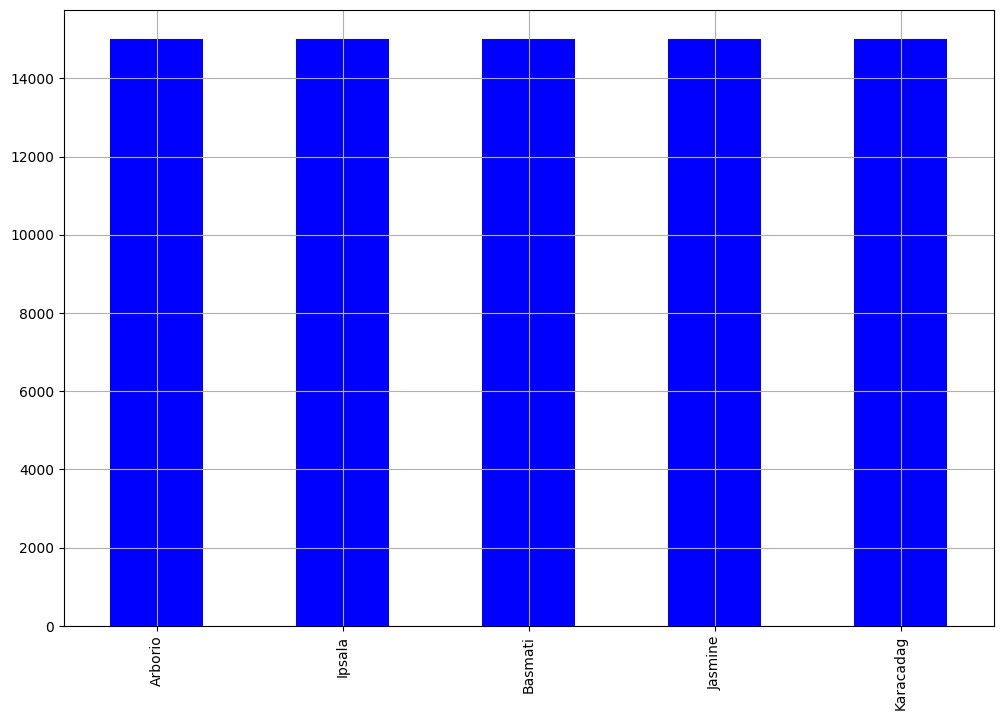

In [ ]:
df.name.value_counts().plot(kind = 'bar', figsize = (12, 8), grid = True, color = 'blue')

In [ ]:
df.shape

(75000, 3)

In [ ]:
train_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_data=train_gen.flow_from_directory("/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset",target_size=(224,224),batch_size=32,class_mode='categorical',shuffle=True,subset='training')
test_data=train_gen.flow_from_directory("/content/drive/MyDrive/UFSC/Trabalhos/Rice_Image_Dataset",target_size=(224,224),batch_size=1,shuffle=False,subset='validation')

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [ ]:
cnn=keras.models.Sequential()
cnn.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding="valid", activation="relu", input_shape=(224, 224,3)))
cnn.add(keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(40, activation='relu'))
cnn.add(keras.layers.Dropout(rate=0.1, seed=100))
cnn.add(keras.layers.Dense(units=5, activation="sigmoid"))
cnn.summary()

In [ ]:
cnn.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
cnn.fit(train_data,batch_size=512, epochs=2, validation_data=test_data, shuffle=True)

Epoch 1/2
1031/1875 [===============>..............] - ETA: 3:12:40 - loss: 0.1623 - accuracy: 0.9510

UnknownError: ignored

In [ ]:
score= cnn.evaluate(test_data,verbose=0)
print("test loss",score[0])
print("test accuracy",score[1])

test loss 0.033686429262161255
test accuracy 0.9901999831199646
